<a href="https://colab.research.google.com/github/raghupriya099/fdsproject/blob/main/fds_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'diabetes_data_upload.csv', 'sample_data']


In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap
    !pip install eli5


     |████████████████████████████████| 10.3MB 3.7MB/s 
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
ERROR: pdpbox 0.2.1 has requirement matplotlib==3.1.1, but you'll have matplotlib 3.4.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


  Using cached https://files.pythonhosted.org/packages/19/7a/60bd79c5d79559150f8bba866dd7d434f0a170312e4d15e8aefa5faba294/matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
ERROR: pandas-profiling 2.12.0 has requirement matplotlib>=3.2.0, but you'll have matplotlib 3.1.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.4.1
    Uninstalling matplotlib-3.4.1:
      Successfully uninstalled matplotlib-3.4.1


Importing and exploring the data set

In [ ]:
diabates = pd.read_csv("diabetes_data_upload.csv")

In [ ]:
diabates.shape

(520, 17)

In [ ]:
# change column names by replacing spaces with underscores
diabates.rename(columns={'sudden weight loss':'sudden_weight_loss', 'Genital thrush': 'Gentital_thrush',
                        'visual blurring': 'visual_blurring', 'delayed healing':'delayed_healing',
                         'partial paresis': 'partial_paresis', 'muscle stiffness':'muscle_stiffness' }, inplace=True)

In [ ]:
# capitalizing the first letter of each head column
diabates.columns=map(lambda x: str(x).capitalize(), diabates.columns)

In [ ]:
diabates.head(5)

,Age,Gender,Polyuria,Polydipsia,Sudden_weight_loss,Weakness,Polyphagia,Gentital_thrush,Visual_blurring,Itching,Irritability,Delayed_healing,Partial_paresis,Muscle_stiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
diabates.sample(5)

,Age,Gender,Polyuria,Polydipsia,Sudden_weight_loss,Weakness,Polyphagia,Gentital_thrush,Visual_blurring,Itching,Irritability,Delayed_healing,Partial_paresis,Muscle_stiffness,Alopecia,Obesity,Class
170,49,Male,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,Positive
162,35,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive
134,35,Male,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,Positive
512,43,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative
227,30,Male,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,Negative


In [ ]:
diabates.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [ ]:
diabates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   Sudden_weight_loss  520 non-null    object
 5   Weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Gentital_thrush     520 non-null    object
 8   Visual_blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  Delayed_healing     520 non-null    object
 12  Partial_paresis     520 non-null    object
 13  Muscle_stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  Class               520 no

Train test data split twice

In [ ]:
# first split
from sklearn.model_selection import train_test_split
train_validate, test=train_test_split(diabates, train_size=0.80, test_size=0.20,
                                      stratify=diabates['Class'], random_state=42)
train_validate.shape, test.shape

((416, 17), (104, 17))

In [ ]:
# second split
train, validate=train_test_split(train_validate, train_size=0.80,
                                 test_size=0.20,
                                 stratify=train_validate['Class'], random_state=42)
train.shape, validate.shape

((332, 17), (84, 17))

In [ ]:
#begin with baselines for classification
target='Class'
y_train=train[target]
y_train.value_counts(normalize=True)

Positive    0.614458
Negative    0.385542
Name: Class, dtype: float64

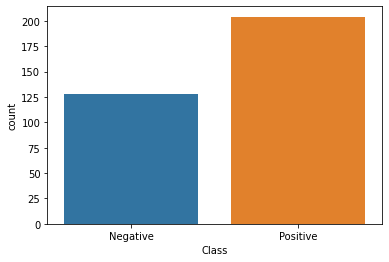

In [ ]:
#visualizing the target
%matplotlib inline
sns.countplot(y_train);

In [ ]:
#checking the majority
majority_class=y_train.mode()[0]
y_pred=[majority_class]*len(y_train)
y_pred

['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',

In [ ]:
from sklearn.metrics import accuracy_score
y_validate=validate[target]
y_pred=[majority_class]*len(y_validate)
accuracy_score(y_validate, y_pred)

0.6190476190476191

Logestic Regression

In [ ]:

# Using the target i choosed
target = 'Class'

# Get a dataframe with all train columns except the target
features = train.columns.drop([target])


# vectors and matrices
X_train = train[features]
y_train = train[target]
X_validate = validate[features]
y_validate = validate[target]
X_test = test[features]
y_test = test[target]

In [ ]:
#making pipeline and fitting the data
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

pipeline=make_pipeline(
     ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    LogisticRegression(random_state=100, max_iter=50) # more iterations higher accuracy
  )

# Fitting on train
pipeline.fit(X_train, y_train)

#prediction on X_test
y_pred1 = pipeline.predict(X_test)

#predict probabilities for the test set.
y_pred_proba1 = pipeline.predict_proba(X_test)[:, -1]

# accuracy is kinda the times the guest try
#score on validate
print('Validation Accuracy', pipeline.score(X_validate, y_validate))
print('Test ROC AUC score', roc_auc_score(y_test, y_pred_proba1))


Validation Accuracy 0.9166666666666666
Test ROC AUC score 0.9839843749999999


Confusion Matrix plot with Logistic Regression

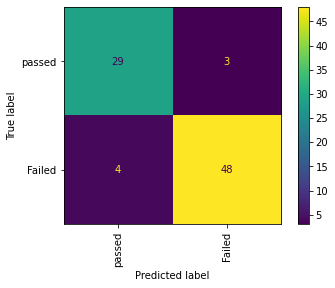

In [ ]:
from sklearn.metrics import plot_confusion_matrix

Classes = ['passed', 'Failed']
plot_confusion_matrix(pipeline, X_validate,
                      y_validate, values_format='.0f',
                      xticks_rotation='vertical',
                      display_labels=Classes);


Classification report with Linear Regression

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

    Negative       0.91      0.97      0.94        40
    Positive       0.98      0.94      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.96      0.95       104
weighted avg       0.95      0.95      0.95       104



Decision Tree Model

In [ ]:

#creating the pipeline with the libraries below
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

pipeline1 = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    DecisionTreeClassifier(criterion='gini',
                             max_depth = 10,
                             max_features = 'auto',
                             random_state = 1,
                             splitter = 'best'))

# Fit on train
pipeline1.fit(X_train, y_train)

# Predict on test
y_pred2 = pipeline1.predict(X_test)

#predict probabilities for the test set.
y_pred_proba2 = pipeline1.predict_proba(X_test)[:, -1]

# accuracy is kinda the times the guest try
print('Validation Accuracy', pipeline1.score(X_validate, y_validate))
print('Test ROC AUC score', roc_auc_score(y_test, y_pred_proba2))

Validation Accuracy 0.9761904761904762
Test ROC AUC score 0.9718749999999999


Confusion matrix plot with Decision Tree

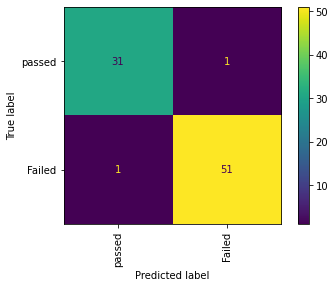

In [ ]:
from sklearn.metrics import plot_confusion_matrix

Classes = ['passed', 'Failed']
plot_confusion_matrix(pipeline1, X_validate, y_validate,
                      values_format='.0f', xticks_rotation='vertical',
                      display_labels=Classes);

Classification report with Decision Tree

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

    Negative       0.95      0.97      0.96        40
    Positive       0.98      0.97      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



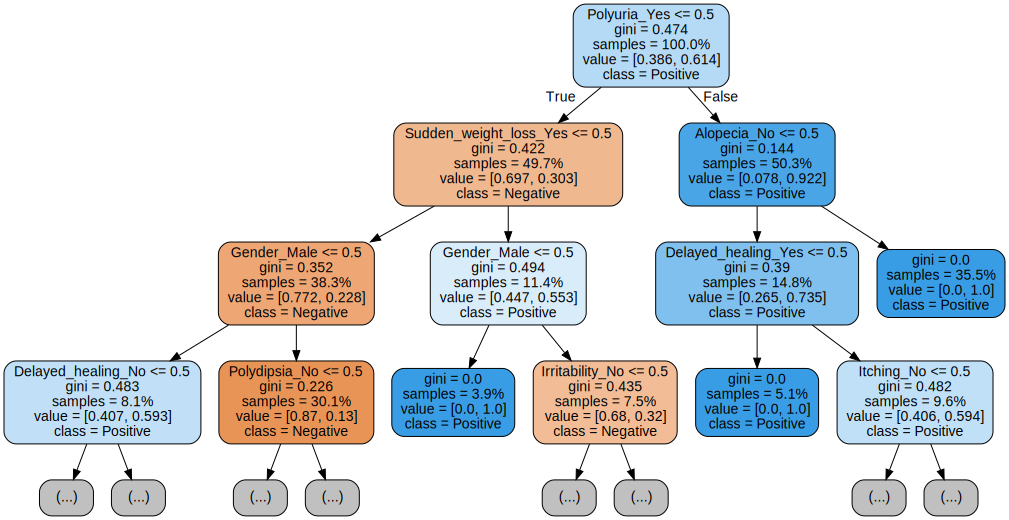

In [ ]:
# visualyzing the desicion trees
import graphviz
from sklearn.tree import export_graphviz

model = pipeline1.named_steps['decisiontreeclassifier']
encoder = pipeline1.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_validate).columns

tree = export_graphviz(model, out_file=None, max_depth=3, feature_names=encoded_columns,
                       class_names=model.classes_,  impurity=True, filled=True,
                       proportion=True,  rounded=True)

display(graphviz.Source(tree))

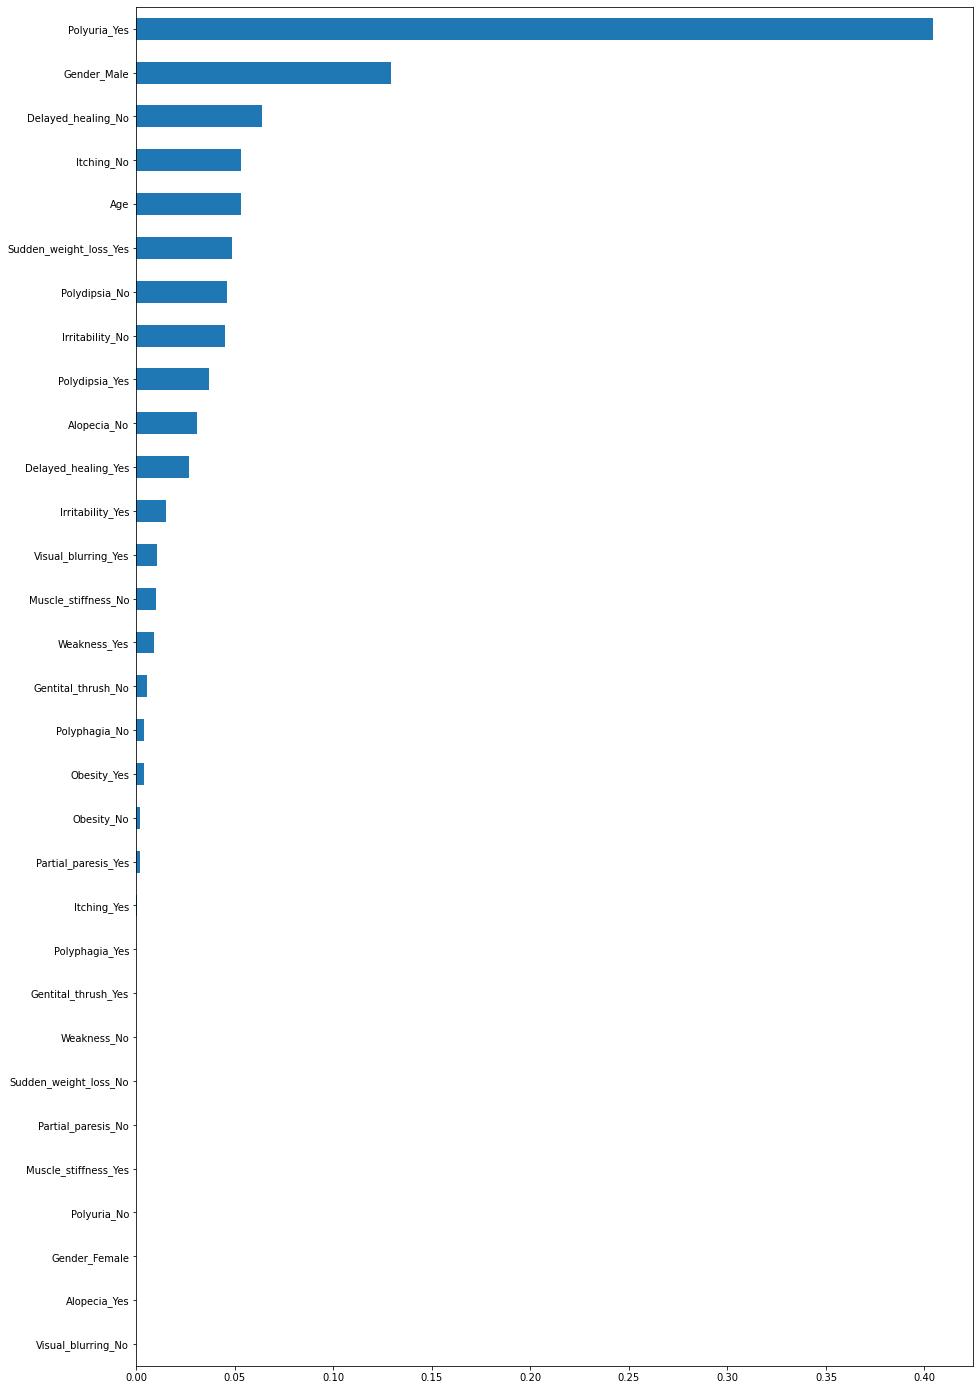

In [ ]:
# visualyzing the feature importances
encoder_columns = pipeline1.named_steps['onehotencoder']

encoded_columns = encoder_columns.transform(X_validate).columns

importances = pd.Series(model.feature_importances_, encoded_columns)

plt.figure(figsize=(15,25))

importances.sort_values().plot.barh();

Random Forest

In [ ]:
# trying ordinal encoding, imputing data and apply random forest
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pipeline3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(random_state=50, n_jobs=-1)
  )

# Fitting on train, score on validate
pipeline3.fit(X_train, y_train)

#prediction on X_test
y_pred3 = pipeline3.predict(X_test)

#predict probabilities for the test set.
y_pred_proba3 = pipeline3.predict_proba(X_test)[:, -1]

# accuracy is kinda the times the guest try
print('Validation Accuracy', pipeline3.score(X_validate, y_validate))
print('Test ROC AUC score', roc_auc_score(y_test, y_pred_proba3))

Validation Accuracy 0.9642857142857143
Test ROC AUC score 0.999609375


Confusion Matrix plot with Random Forest

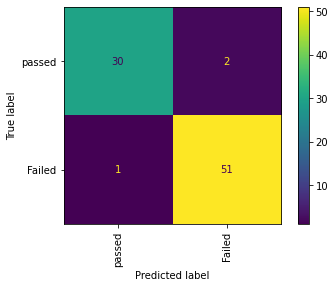

In [ ]:
from sklearn.metrics import plot_confusion_matrix

Classes = ['passed', 'Failed']
plot_confusion_matrix(pipeline3, X_validate, y_validate,
                      values_format='.0f', xticks_rotation='vertical',
                      display_labels=Classes);

Classification report with Random Forest

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

    Negative       0.95      1.00      0.98        40
    Positive       1.00      0.97      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104

